# `01` Import Necessary Libraries

## `i` Default Libraries

In [217]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries used throughout the notebook

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  , SGDClassifier
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


----------------------------

# `02` Load Data


[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [219]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\PCCV\AppData\Local\Temp\ipykernel_27424\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis



In [220]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [221]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Handling Corrupted Data 

In [223]:
train['Annual_Income'] = train['Annual_Income'].str.replace("_" , "").astype(float)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].str.replace("_" , "").astype(float)

if train['Annual_Income'].dtype == 'object':
    train['Annual_Income'].str.replace("," , "").astype(float)

In [224]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].str.replace("_" , "")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace("", np.nan).astype(float)


In [225]:
train['Credit_Mix'] = train['Credit_Mix'].str.replace("_" , "")
train['Credit_Mix'] = train['Credit_Mix'].replace("", np.nan)
train['Occupation'] = train['Occupation'].str.replace("_" , "")
train['Occupation'] = train['Occupation'].replace("", np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].str.replace("!@9#%8" , "")
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace("", np.nan)

# Convert columns to numeric, invalid parsing will be set as NaN

In [ ]:

columns_to_convert = ['Monthly_Balance','Amount_invested_monthly','Annual_Income','Age', 'Num_of_Loan', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

for column in columns_to_convert:
    train[column] = pd.to_numeric(train[column], errors='coerce')


# Filter out outliers

In [ ]:

train.loc[(train['Age'] > 60) | (train['Age'] < 14), 'Age'] = np.nan
train.loc[(train['Num_of_Loan'] < 1) | (train['Num_of_Loan'] > 13), 'Num_of_Loan'] = np.nan
train.loc[(train['Delay_from_due_date'] < 1 ) , 'Delay_from_due_date'] = np.nan
train.loc[(train['Annual_Income'] < 0) | (train['Annual_Income'] > 200000), 'Annual_Income'] = np.nan
train.loc[(train['Num_Bank_Accounts'] < 0) | (train['Num_Bank_Accounts'] > 15), 'Num_Bank_Accounts'] = np.nan
train.loc[(train['Num_Credit_Card'] < 0) | (train['Num_Credit_Card'] > 12), 'Num_Credit_Card'] = np.nan
train.loc[(train['Interest_Rate'] < 0) | (train['Interest_Rate'] > 50), 'Interest_Rate'] = np.nan
train.loc[(train['Num_of_Delayed_Payment'] < 0) | (train['Num_of_Delayed_Payment'] > 45), 'Num_of_Delayed_Payment'] = np.nan
train.loc[(train['Num_Credit_Inquiries'] < 0) | (train['Num_Credit_Inquiries'] > 25), 'Num_Credit_Inquiries'] = np.nan
train.loc[(train['Credit_Utilization_Ratio'] < 20) | (train['Credit_Utilization_Ratio'] > 45), 'Credit_Utilization_Ratio'] = np.nan
train.loc[(train['Total_EMI_per_month'] < 0) | (train['Total_EMI_per_month'] > 500), 'Total_EMI_per_month'] = np.nan
train.loc[(train['Amount_invested_monthly'] < 0) | (train['Amount_invested_monthly'] > 1200), 'Amount_invested_monthly'] = np.nan
train.loc[(train['Monthly_Balance'] < 0) | (train['Monthly_Balance'] > 1200), 'Monthly_Balance'] = np.nan

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       92365 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             99001 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         98664 non-null   float64
 10  Num_Credit_Card           97729 non-null   float64
 11  Interest_Rate             97966 non-null   float64
 12  Num_of_Loan               80512 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [229]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

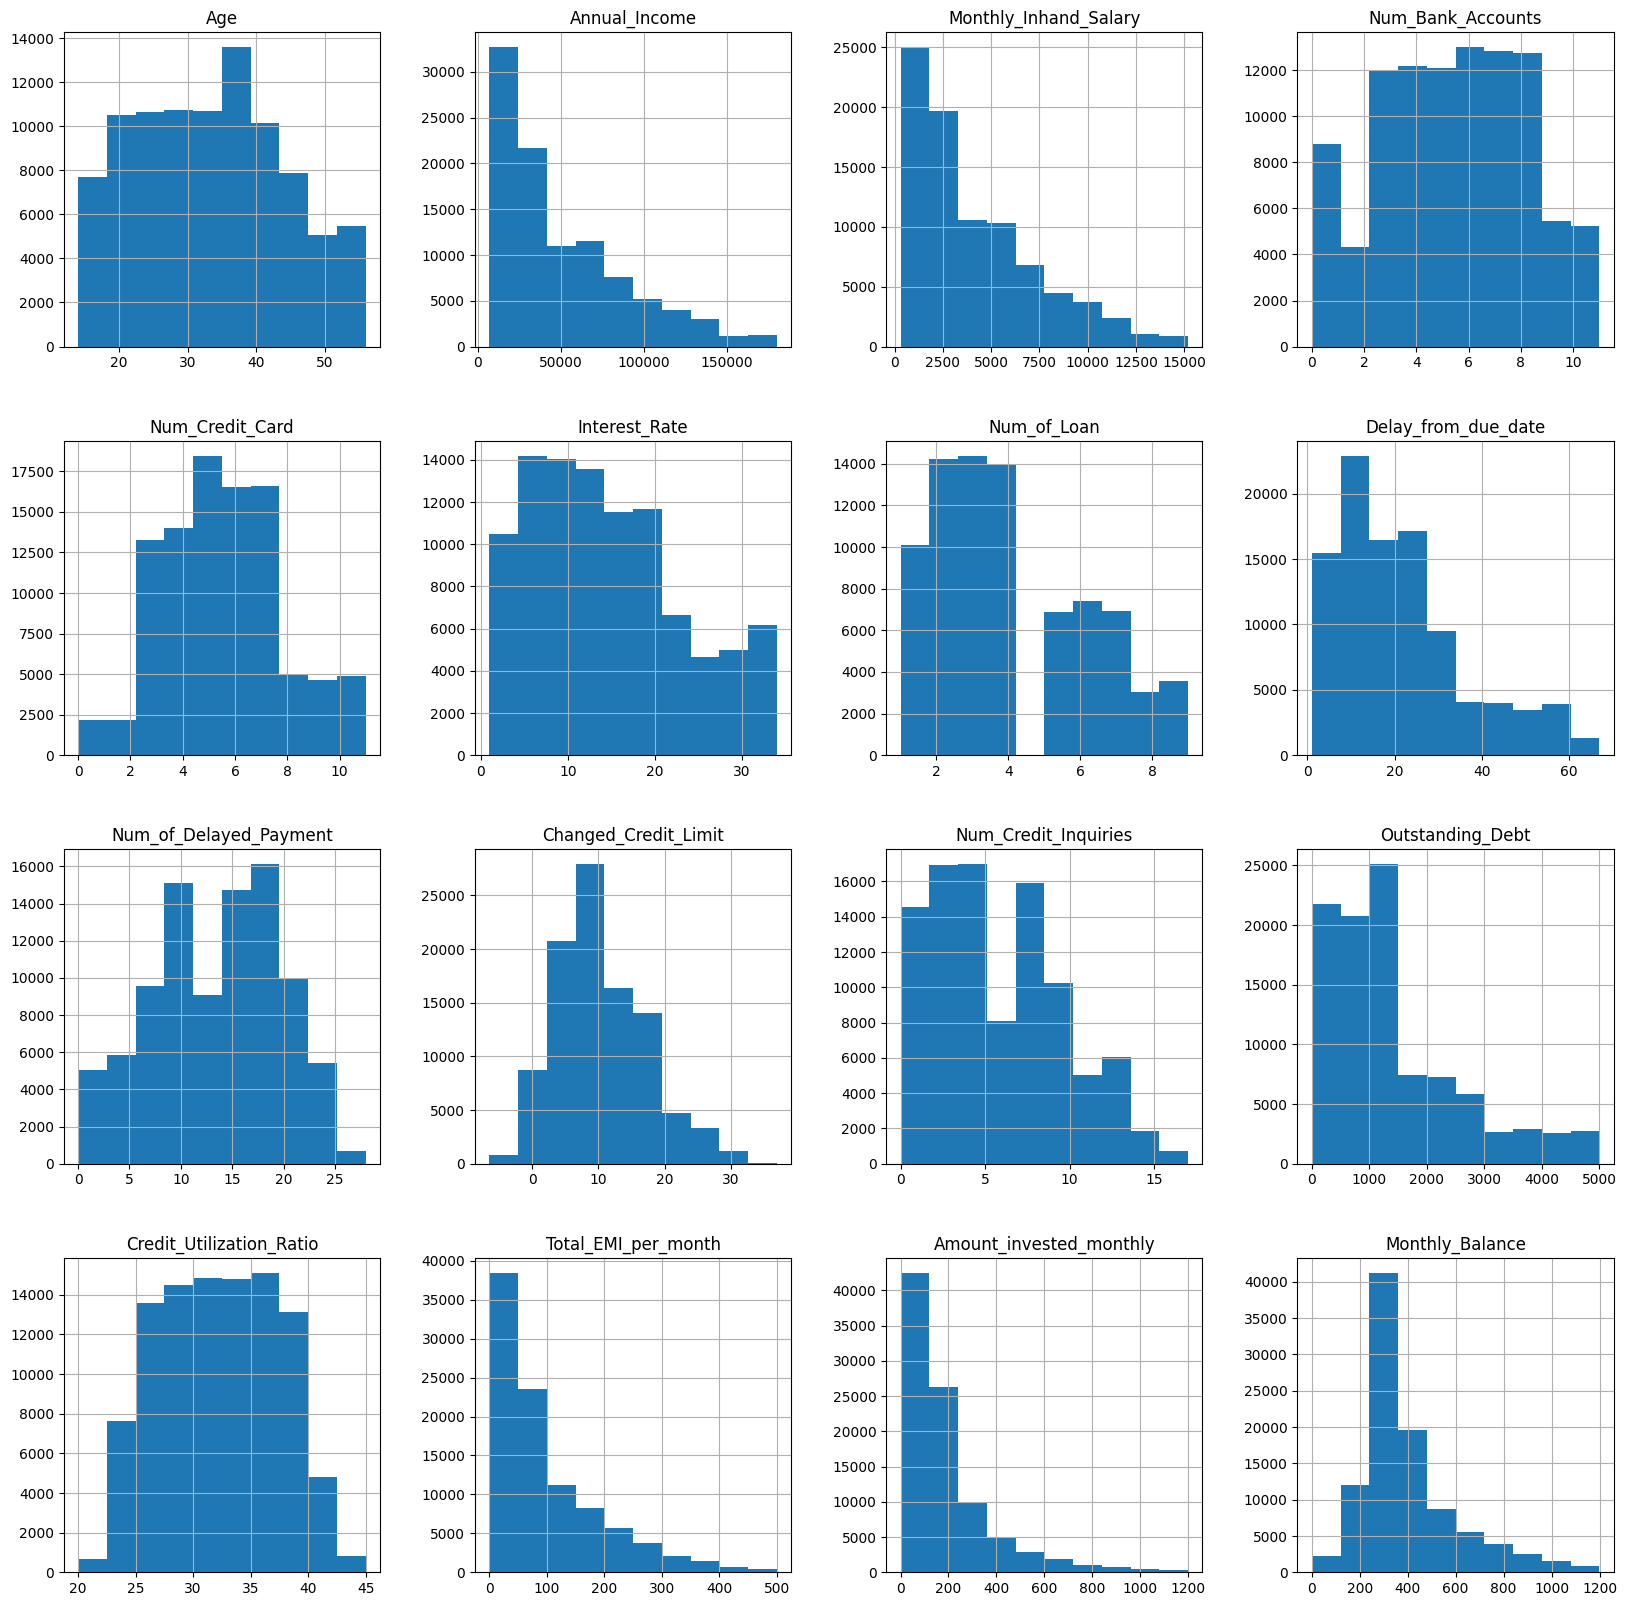

In [231]:
train.hist(figsize=(20,20))

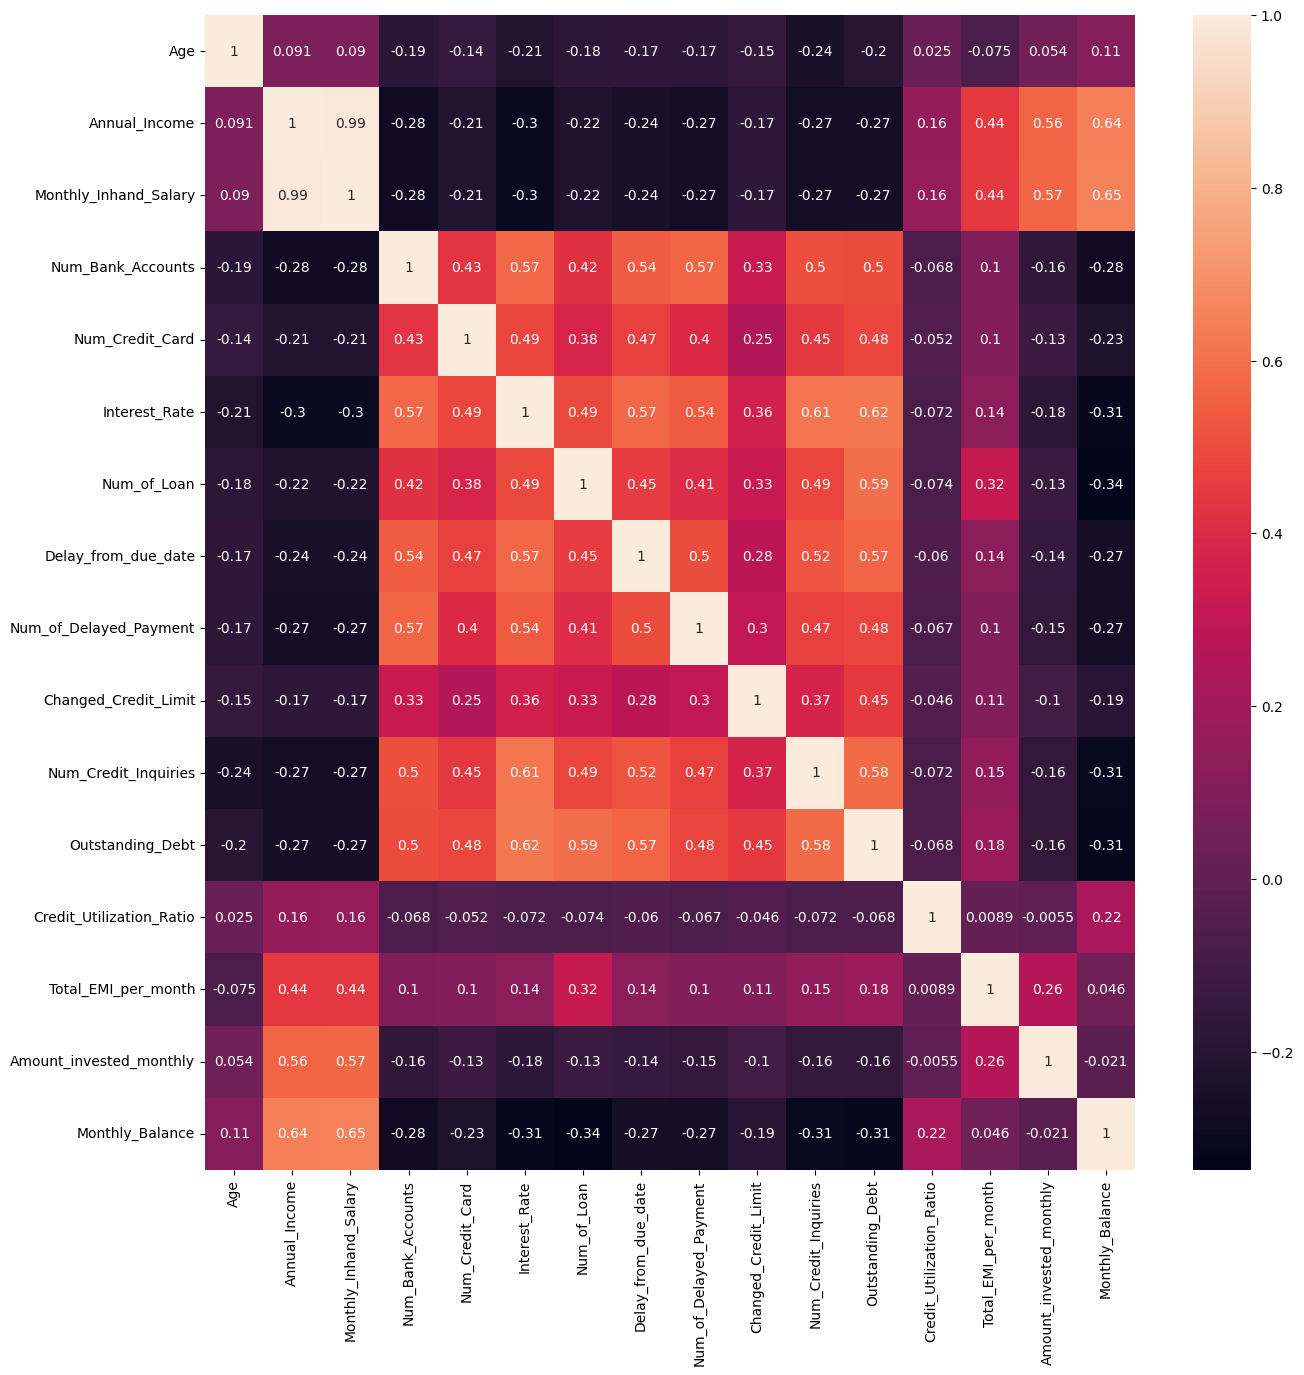

In [273]:
plt.figure(figsize=(15,15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.


In [232]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')


# Fill missing values by imputing

In [233]:

# Define categorical and numerical columns
categorical_columns1 = ['Type_of_Loan', 'Credit_Mix', 'Occupation', 'Payment_Behaviour', 'Credit_History_Age']

numerical_columns1 = [
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance',
    'Num_of_Loan', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Changed_Credit_Limit', 'Outstanding_Debt'
]

# Handle missing values separately for specific columns
train['Age'].fillna(method='ffill', inplace=True)
train['Monthly_Inhand_Salary'].fillna(train['Annual_Income'] / 12, inplace=True)

# Apply imputers to categorical and numerical columns efficiently
train[categorical_columns1] = imputer_cat.fit_transform(train[categorical_columns1])
train[numerical_columns1] = imputer_num.fit_transform(train[numerical_columns1])

C:\Users\PCCV\AppData\Local\Temp\ipykernel_27424\644672382.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(method='ffill', inplace=True)
C:\Users\PCCV\AppData\Local\Temp\ipykernel_27424\644672382.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Age'].fillna(method='ffill', inplace=True)
C:\Users\PCCV\AppData\Local\Temp\ipykernel_27424\644672382.py:13: FutureWarning: A value is trying to be set on a copy 

In [234]:
# columns_to_fill = [
#     'Age', 'Type_of_Loan', 'Credit_Mix', 'Occupation', 'Num_of_Delayed_Payment',
#     'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly',
#     'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Delay_from_due_date',
#     'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
#     'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Changed_Credit_Limit','Payment_Behaviour','Outstanding_Debt'
# ]

# for column in columns_to_fill:
#     train[column].fillna(method='bfill', inplace=True)


In [235]:
#train.dropna(subset='Payment_Behaviour' ,inplace=True)

In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# `Dropping` some columns

In [237]:
# Colomns to drop 

train = train.drop(columns=['Name' ,'Customer_ID', 'ID', 'SSN','Month'])

# `Splitting` train set into X and Y ( Train and Test )

In [238]:
X = train.drop('Credit_Score'  , axis=1)
Y = train['Credit_Score']

In [239]:
x_train , x_test  , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=88 )

# `Encoding` the categorical data

In [240]:
ordinal_encoder = OrdinalEncoder()
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_History_Age']
x_train[categorical_columns] = ordinal_encoder.fit_transform(x_train[categorical_columns])
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40495,24.0,5.0,130402.880,10866.906667,4.0,5.0,7.0,1.0,0.0,4.0,...,3.0,1.0,943.72,36.725175,86.0,1.0,65.245240,502.244254,2.0,782.805673
80758,50.0,4.0,129308.520,10979.710000,5.0,3.0,1.0,4.0,1125.0,14.0,...,2.0,2.0,1475.43,28.580327,246.0,1.0,65.245240,1128.743996,4.0,335.737404
81293,44.0,13.0,20397.855,1690.821250,1.0,3.0,8.0,4.0,4144.0,18.0,...,6.0,1.0,961.39,36.961067,183.0,1.0,9.816434,36.086517,1.0,373.179175
10452,28.0,5.0,16538.390,1359.199167,10.0,5.0,16.0,7.0,788.0,43.0,...,9.0,0.0,3843.16,39.576364,144.0,0.0,82.941885,92.955858,5.0,250.022174
51005,42.0,3.0,32829.620,2945.801667,5.0,7.0,10.0,3.0,3366.0,7.0,...,2.0,1.0,823.88,28.513539,183.0,1.0,65.245240,151.015289,4.0,348.936542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,34.0,12.0,17732.920,1333.841801,7.0,8.0,23.0,8.0,3475.0,60.0,...,9.0,0.0,4963.83,29.201511,396.0,2.0,77.929884,105.132154,4.0,241.213827
56212,25.0,2.0,10307.970,625.997500,8.0,3.0,13.0,2.0,2091.0,6.0,...,10.0,2.0,480.17,21.980430,86.0,2.0,11.022190,73.883676,5.0,267.693883
90474,26.0,4.0,16128.395,1264.032917,7.0,3.0,10.0,3.0,1151.0,25.0,...,7.0,2.0,1212.99,31.788945,98.0,2.0,36.344052,115.337977,4.0,254.721263
2481,53.0,8.0,55662.640,4900.553333,4.0,6.0,6.0,3.0,5745.0,27.0,...,2.0,2.0,1078.02,36.844375,186.0,2.0,90.949946,139.365582,1.0,509.739806


In [241]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

array([0, 0, 1, ..., 2, 2, 2])

# `Scaling` all the Features

In [242]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns) 
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.863134,-0.468914,2.093087,2.087635,-0.530787,-0.254497,-0.867165,-1.497438,-1.858874,-1.196141,...,-0.726487,-0.482960,-0.418302,0.877550,-0.910530,-0.583827,-0.332570,1.786302,-0.492841,1.939178
1,1.549802,-0.709039,2.064448,2.122974,-0.142558,-1.233827,-1.560115,0.004098,-1.203178,-0.508486,...,-0.990443,0.793909,0.044539,-0.725254,0.545008,-0.583827,-0.332570,5.316882,0.574261,-0.298956
2,0.992971,1.452088,-0.785756,-0.787088,-1.695474,-1.233827,-0.751673,0.004098,0.556416,-0.233424,...,0.065382,-0.482960,-0.402921,0.923970,-0.028110,-0.583827,-0.921849,-0.840686,-1.026393,-0.111513
3,-0.491913,-0.468914,-0.886759,-0.890980,1.798588,-0.254497,0.172260,1.505634,-1.399596,1.485715,...,0.857251,-1.759828,2.105591,1.438628,-0.382898,-2.027649,-0.144432,-0.520204,1.107813,-0.728067
4,0.807360,-0.949164,-0.460416,-0.393923,-0.142558,0.724832,-0.520690,-0.496414,0.102966,-0.989845,...,-0.990443,-0.482960,-0.522620,-0.738397,-0.028110,-0.583827,-0.332570,-0.193016,0.574261,-0.232877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.064918,1.211963,-0.855498,-0.898924,0.633900,1.214497,0.980702,2.006146,0.166496,2.654729,...,0.857251,-1.759828,3.081108,-0.603013,1.909575,0.859994,-0.197716,-0.451586,0.574261,-0.772164
79996,-0.770329,-1.189289,-1.049810,-1.120681,1.022130,-1.233827,-0.174215,-0.996926,-0.640155,-1.058610,...,1.121207,0.793909,-0.821811,-2.024031,-0.910530,0.859994,-0.909031,-0.627684,1.107813,-0.639598
79997,-0.677523,-0.709039,-0.897488,-0.920794,0.633900,-1.233827,-0.520690,-0.496414,-1.188025,0.247935,...,0.329338,0.793909,-0.183909,-0.093838,-0.801365,0.859994,-0.639827,-0.394072,0.574261,-0.704542
79998,1.828218,0.251462,0.137127,0.218470,-0.530787,0.235168,-0.982657,-0.496414,1.489543,0.385466,...,-0.990443,0.793909,-0.301397,0.901007,-0.000819,0.859994,-0.059297,-0.258666,-1.026393,0.572143


In [243]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80000 non-null  float64
 1   Occupation                80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  float64
 6   Interest_Rate             80000 non-null  float64
 7   Num_of_Loan               80000 non-null  float64
 8   Type_of_Loan              80000 non-null  float64
 9   Delay_from_due_date       80000 non-null  float64
 10  Num_of_Delayed_Payment    80000 non-null  float64
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Credit_Mix                80000 non-null  float64
 14  Outsta

## `#` Prepare Test Set

Apply the data transformations used on the training set to the test set.



In [244]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
87676,35.0,Developer,35325.29,2764.774167,5.0,3.0,10.0,3.0,"Home Equity Loan, Student Loan, and Credit-Bui...",13.0,...,4.0,Standard,1037.07,38.514456,30 Years and 6 Months,No,66.842920,106.040476,High_spent_Medium_value_payments,353.594020
31492,36.0,Entrepreneur,11629.69,969.140833,7.0,3.0,4.0,4.0,Not Specified,18.0,...,7.0,Good,517.34,31.638298,27 Years and 11 Months,No,0.000000,139.264070,Low_spent_Small_value_payments,277.050014
35517,29.0,Scientist,44219.46,3855.955000,6.0,7.0,12.0,7.0,"Mortgage Loan, Not Specified, Home Equity Loan...",25.0,...,7.0,Standard,1685.80,34.801928,7 Years and 9 Months,Yes,206.321039,128.463415,High_spent_Small_value_payments,262.207452
37967,32.0,Developer,45243.21,3770.267500,7.0,7.0,21.0,3.0,"Not Specified, Mortgage Loan, and Student Loan",61.0,...,6.0,Bad,2482.56,31.684700,13 Years and 8 Months,Yes,89.296816,124.494682,High_spent_Medium_value_payments,421.735252
72103,34.0,Accountant,122332.04,9219.325793,1.0,1.0,13.0,4.0,Not Specified,7.0,...,2.0,Good,605.35,41.272780,18 Years and 4 Months,No,65.245240,327.482445,High_spent_Medium_value_payments,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,16.0,Writer,83403.20,6825.266667,9.0,5.0,25.0,6.0,"Home Equity Loan, Not Specified, Debt Consolid...",55.0,...,6.0,Standard,1668.73,34.073846,19 Years and 4 Months,Yes,287.193529,487.152325,Low_spent_Small_value_payments,198.180813
47572,18.0,Lawyer,118042.88,9823.906667,6.0,3.0,9.0,1.0,Debt Consolidation Loan,24.0,...,0.0,Standard,1476.36,30.820205,17 Years and 8 Months,Yes,56.101296,215.900528,High_spent_Small_value_payments,970.388843
56089,19.0,Architect,26922.65,2343.554167,4.0,7.0,17.0,3.0,"Payday Loan, Payday Loan, and Student Loan",26.0,...,2.0,Standard,1179.89,34.727677,20 Years and 3 Months,No,58.959536,298.128666,Low_spent_Small_value_payments,167.267215
92857,34.0,Teacher,16444.42,1411.368333,7.0,8.0,24.0,3.0,"Debt Consolidation Loan, Not Specified, and Mo...",62.0,...,6.0,Standard,1445.18,38.317170,18 Years and 8 Months,Yes,31.126629,20.320658,High_spent_Large_value_payments,329.689546


In [245]:
print("Train columns:", x_train[categorical_columns].columns)
print("Test columns:", x_test[categorical_columns].columns)

x_train.columns == x_test.columns

Train columns: Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_History_Age'],
      dtype='object')
Test columns: Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_History_Age'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [246]:
x_test[categorical_columns] = ordinal_encoder.transform(x_test[categorical_columns])
x_test


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
87676,35.0,2.0,35325.29,2764.774167,5.0,3.0,10.0,3.0,2763.0,13.0,...,4.0,2.0,1037.07,38.514456,295.0,1.0,66.842920,106.040476,1.0,353.594020
31492,36.0,5.0,11629.69,969.140833,7.0,3.0,4.0,4.0,3463.0,18.0,...,7.0,1.0,517.34,31.638298,242.0,1.0,0.000000,139.264070,5.0,277.050014
35517,29.0,12.0,44219.46,3855.955000,6.0,7.0,12.0,7.0,3162.0,25.0,...,7.0,2.0,1685.80,34.801928,379.0,2.0,206.321039,128.463415,2.0,262.207452
37967,32.0,2.0,45243.21,3770.267500,7.0,7.0,21.0,3.0,3832.0,61.0,...,6.0,0.0,2482.56,31.684700,69.0,2.0,89.296816,124.494682,1.0,421.735252
72103,34.0,0.0,122332.04,9219.325793,1.0,1.0,13.0,4.0,3463.0,7.0,...,2.0,1.0,605.35,41.272780,125.0,1.0,65.245240,327.482445,1.0,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,16.0,14.0,83403.20,6825.266667,9.0,5.0,25.0,6.0,2495.0,55.0,...,6.0,2.0,1668.73,34.073846,137.0,2.0,287.193529,487.152325,5.0,198.180813
47572,18.0,7.0,118042.88,9823.906667,6.0,3.0,9.0,1.0,1410.0,24.0,...,0.0,2.0,1476.36,30.820205,117.0,2.0,56.101296,215.900528,2.0,970.388843
56089,19.0,1.0,26922.65,2343.554167,4.0,7.0,17.0,3.0,4723.0,26.0,...,2.0,2.0,1179.89,34.727677,160.0,1.0,58.959536,298.128666,5.0,167.267215
92857,34.0,13.0,16444.42,1411.368333,7.0,8.0,24.0,3.0,1837.0,62.0,...,6.0,2.0,1445.18,38.317170,129.0,2.0,31.126629,20.320658,0.0,329.689546


In [247]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.157724,-1.189289,-0.395104,-0.450636,-0.142558,-1.233827,-0.520690,-0.496414,-0.248486,-0.577251,...,-0.462531,0.793909,-0.337043,1.229658,0.990767,-0.583827,-0.315585,-0.446467,-1.026393,-0.209561
1,0.250529,-0.468914,-1.015220,-1.013179,0.633900,-1.233827,-1.213640,0.004098,0.159502,-0.233424,...,0.329338,-0.482960,-0.789456,-0.123484,0.508620,-0.583827,-1.026211,-0.259239,1.107813,-0.592759
2,-0.399108,1.211963,-0.162342,-0.108786,0.245671,0.724832,-0.289707,1.505634,-0.015933,0.247935,...,0.329338,0.793909,0.227661,0.499079,1.754924,0.859994,1.167245,-0.320105,-0.492841,-0.667065
3,-0.120692,-1.189289,-0.135551,-0.135631,0.633900,0.724832,0.749719,-0.496414,0.374570,2.723494,...,0.065382,-1.759828,0.921221,-0.114352,-1.065181,0.859994,-0.076871,-0.342470,-1.026393,0.131571
4,0.064918,-1.669540,1.881873,1.571474,-1.695474,-2.213156,-0.174215,0.004098,0.159502,-0.989845,...,-0.990443,-0.482960,-0.712845,1.772461,-0.555743,-0.583827,-0.332570,0.801448,-1.026393,2.793973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.605576,1.692213,0.863101,0.821453,1.410359,-0.254497,1.211685,1.005122,-0.404687,2.310901,...,0.065382,0.793909,0.212802,0.355801,-0.446577,0.859994,2.027023,1.701253,1.107813,-0.987598
19996,-1.419965,0.011337,1.769625,1.760879,0.245671,-1.233827,-0.636182,-1.497438,-1.037069,0.179169,...,-1.518356,0.793909,0.045348,-0.284474,-0.628520,0.859994,-0.429782,0.172639,-0.492841,2.878266
19997,-1.327160,-1.429414,-0.615002,-0.582597,-0.530787,0.724832,0.287752,-0.496414,0.893880,0.316701,...,-0.990443,0.793909,-0.212722,0.484467,-0.237344,-0.583827,-0.399396,0.636028,1.107813,-1.142359
19998,0.064918,1.452088,-0.889218,-0.874637,0.633900,1.214497,1.096194,-0.496414,-0.788196,2.792260,...,0.065382,0.793909,0.018207,1.190834,-0.519354,0.859994,-0.695295,-0.929533,-1.559944,-0.329233


In [248]:
y_test = label_encoder.transform(y_test)
y_test


array([2, 0, 2, ..., 2, 1, 1])

In [249]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80000 non-null  float64
 1   Occupation                80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  float64
 6   Interest_Rate             80000 non-null  float64
 7   Num_of_Loan               80000 non-null  float64
 8   Type_of_Loan              80000 non-null  float64
 9   Delay_from_due_date       80000 non-null  float64
 10  Num_of_Delayed_Payment    80000 non-null  float64
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Credit_Mix                80000 non-null  float64
 14  Outsta

----------------------

# `05` Logistic Regression


## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 88$

In [250]:
log_r = LogisticRegression(penalty=None, random_state=88)
log_r.fit(x_train,y_train)

LogisticRegression(penalty=None, random_state=88)

In [251]:
y_pred = log_r.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.


In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      3663
           1       0.66      0.53      0.59      5735
           2       0.65      0.76      0.70     10602

    accuracy                           0.64     20000
   macro avg       0.63      0.59      0.60     20000
weighted avg       0.64      0.64      0.64     20000



## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity

In [253]:
log_r2 = LogisticRegression(random_state=88)
log_r2.fit(x_train,y_train)

LogisticRegression(random_state=88)

In [254]:
y_pred2 = log_r2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      3663
           1       0.66      0.53      0.59      5735
           2       0.65      0.76      0.70     10602

    accuracy                           0.64     20000
   macro avg       0.63      0.59      0.60     20000
weighted avg       0.64      0.64      0.64     20000



In [255]:
log_r3 = LogisticRegression(penalty='l1',solver='saga',random_state=88)
log_r3.fit(x_train,y_train)

LogisticRegression(penalty='l1', random_state=88, solver='saga')

In [256]:
y_pred3 = log_r3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      3663
           1       0.67      0.53      0.59      5735
           2       0.65      0.76      0.70     10602

    accuracy                           0.64     20000
   macro avg       0.63      0.59      0.60     20000
weighted avg       0.64      0.64      0.64     20000



## `iv` Tuning Hyperparameters



In [257]:
params = [
    {
        'solver': ['sag'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2']
    }, 
    {
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2']
    },
    {
        'solver': ['lbfgs'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2']
    } 
]

grid_search = GridSearchCV(log_r, cv=5 ,param_grid=params, n_jobs=-1, verbose=1)

In [258]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(penalty=None, random_state=88),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             verbose=1)

In [259]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.184080,0.051487,0.007641,0.004066,0.001,l2,sag,"{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}",0.639188,0.633000,0.645125,0.642500,0.641813,0.640325,0.004121,25
1,1.443911,0.061123,0.006000,0.001473,0.010,l2,sag,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}",0.644375,0.636000,0.648625,0.646000,0.644625,0.643925,0.004240,2
2,2.576288,0.124387,0.004726,0.001587,0.100,l2,sag,"{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}",0.644437,0.636250,0.647500,0.645500,0.645312,0.643800,0.003906,18
3,3.561598,0.274754,0.006498,0.001569,1.000,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.644500,0.636250,0.647437,0.645625,0.645188,0.643800,0.003898,21
4,3.671176,0.194911,0.005944,0.002199,10.000,l2,sag,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.644500,0.636375,0.647375,0.645625,0.645188,0.643813,0.003838,17
5,3.495534,0.184512,0.007806,0.007612,100.000,l2,sag,"{'C': 100, 'penalty': 'l2', 'solver': 'sag'}",0.644563,0.636375,0.647375,0.645687,0.645188,0.643837,0.003846,12
6,3.529595,0.106435,0.006108,0.001886,1000.000,l2,sag,"{'C': 1000, 'penalty': 'l2', 'solver': 'sag'}",0.644563,0.636375,0.647375,0.645687,0.645188,0.643837,0.003846,12
7,1.633670,0.051689,0.005147,0.002637,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.627062,0.622125,0.633375,0.628313,0.630625,0.628300,0.003764,28
8,1.416739,0.097262,0.004352,0.001148,0.001,l2,saga,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",0.639188,0.633000,0.645062,0.642500,0.641875,0.640325,0.004112,25
9,1.767837,0.128958,0.005143,0.002954,0.010,l1,saga,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.642500,0.635938,0.647437,0.644250,0.643375,0.642700,0.003770,24


In [260]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [261]:
grid_search.best_score_

np.float64(0.64395)

In [262]:
#with class weight
balanced_model = LogisticRegression(solver='saga',C=0.1,penalty='l1' , class_weight='balanced' , random_state=88)
balanced_model.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=88, solver='saga')

In [263]:
#without class weight 
standard_model = LogisticRegression(solver='saga',C=0.1,penalty='l1' , random_state=88)
standard_model.fit(x_train,y_train)


LogisticRegression(C=0.1, penalty='l1', random_state=88, solver='saga')

In [264]:
print("Accuracy of model with class weight : " , balanced_model.score(x_test,y_test))
print("Accuracy of model without class weight : " , standard_model.score(x_test,y_test))

Accuracy of model with class weight :  0.6366
Accuracy of model without class weight :  0.64255


-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.





In [265]:
sgd = SGDClassifier(loss='log_loss' , alpha=0.0001 , random_state=88)
sgd.fit(x_train,y_train)

SGDClassifier(loss='log_loss', random_state=88)

In [266]:
sgd_pred = sgd.predict(x_test)

In [267]:
sgd.score(x_test,y_test)

0.64275

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [268]:
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49      3663
           1       0.65      0.58      0.61      5735
           2       0.66      0.75      0.70     10602

    accuracy                           0.64     20000
   macro avg       0.62      0.59      0.60     20000
weighted avg       0.64      0.64      0.64     20000



-----------------------------

# `Pipeline` for a Better Flow


In [271]:
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_History_Age']
numerical_columns = x_train.drop(columns=categorical_columns).columns.to_list()

preprocessing = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ]) 

pipeline = Pipeline(
    steps=[
    ('preprocessing', preprocessing),
    ('regressor', LogisticRegression( C= 0.1, penalty='l1',max_iter=1000, solver= 'saga', random_state=88))
])
pipeline.fit(x_train,y_train)
pip_pred = pipeline.predict(x_test)
print(classification_report(y_test,pip_pred))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42      3663
           1       0.64      0.51      0.56      5735
           2       0.62      0.78      0.69     10602

    accuracy                           0.62     20000
   macro avg       0.61      0.54      0.56     20000
weighted avg       0.62      0.62      0.61     20000



C:\Users\PCCV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


----------------------------------------------

